In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
pd.options.mode.chained_assignment = None  # default='warn'

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dft25 = pd.read_csv('perfRaspberry/25_7.csv')
dft25  ["alarmas"]= "25"

dft50 = pd.read_csv('perfRaspberry/50_7.csv')
dft50  ["alarmas"]= "50"

dft75 = pd.read_csv('perfRaspberry/75_7.csv')
dft75  ["alarmas"]= "75"

dft100 = pd.read_csv('perfRaspberry/100_7.csv')
dft100  ["alarmas"]= "100"

dft125 = pd.read_csv('perfRaspberry/125_7.csv')
dft125  ["alarmas"]= "125"

dft150 = pd.read_csv('perfRaspberry/150_7.csv')
dft150  ["alarmas"]= "150"

dft175 = pd.read_csv('perfRaspberry/175_7.csv')
dft175  ["alarmas"]= "175"

In [3]:
def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def CastAll(df1,df2,df3,df4,df5,df6,df7,N_column,lowerorgreater,mlimit,media):
    df1[N_column] = CastOutLayers(df1,N_column,lowerorgreater,mlimit)
    df2[N_column] = CastOutLayers(df2,N_column,lowerorgreater,mlimit)
    df3[N_column] = CastOutLayers(df3,N_column,lowerorgreater,mlimit)
    df4[N_column] = CastOutLayers(df4,N_column,lowerorgreater,mlimit)
    df5[N_column] = CastOutLayers(df5,N_column,lowerorgreater,mlimit)
    df6[N_column] = CastOutLayers(df6,N_column,lowerorgreater,mlimit)
    df7[N_column] = CastOutLayers(df7,N_column,lowerorgreater,mlimit)
    if media:
        return [df1[N_column].mean(),df2[N_column].mean(),df3[N_column].mean(),df4[N_column].mean(),df5[N_column].mean(),df6[N_column].mean(),df7[N_column].mean()]
    else:
        return [df1[N_column].median(),df2[N_column].median(),df3[N_column].median(),df4[N_column].median(),df5[N_column].median(),df6[N_column].median(),df7[N_column].median()]

def CastAndPlot(data,N_column,morder):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,data)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend(N_column, loc='upper center')
    plt.xticks(np.arange(25, 200, step=25))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(N_column)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)

In [4]:
morder=[25, 50, 75, 100, 125, 150, 175]

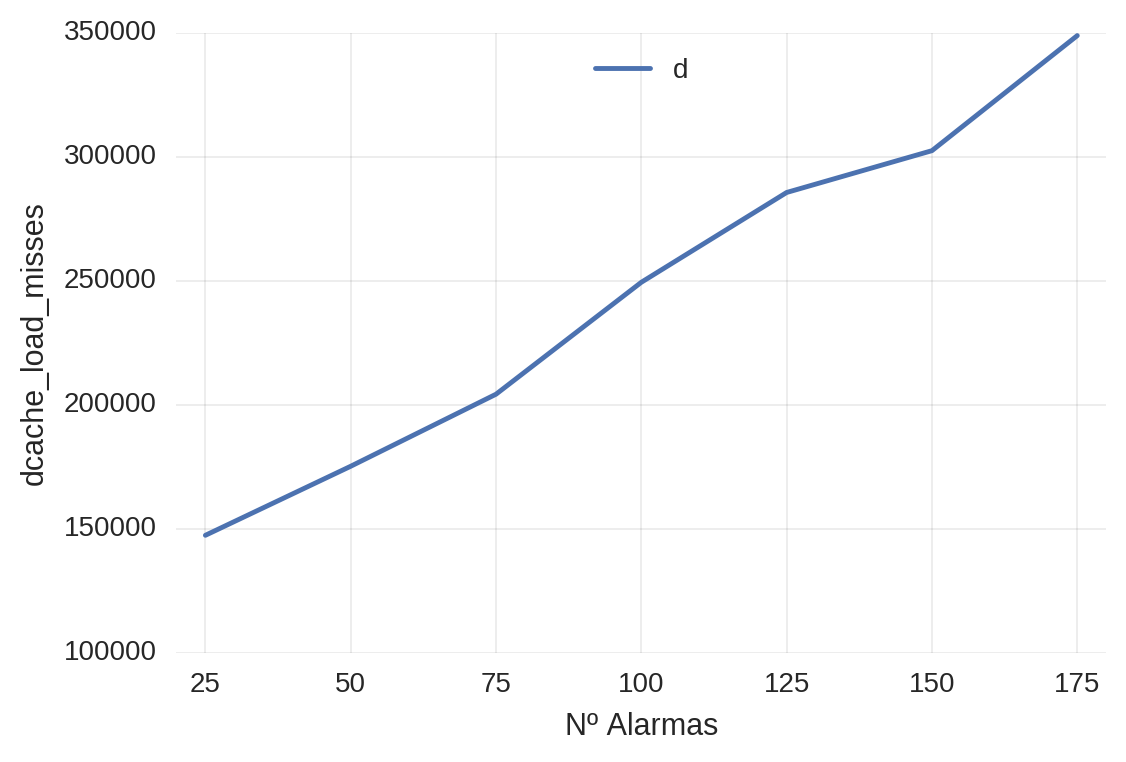

In [5]:
dcache_load_misses25 = dft25[['dcache_load_misses','alarmas']]
dcache_load_misses50 = dft50[['dcache_load_misses','alarmas']]
dcache_load_misses75 = dft75[['dcache_load_misses','alarmas']]
dcache_load_misses100 = dft100[['dcache_load_misses','alarmas']]
dcache_load_misses125 = dft125[['dcache_load_misses','alarmas']]
dcache_load_misses150 = dft150[['dcache_load_misses','alarmas']]
dcache_load_misses175 = dft175[['dcache_load_misses','alarmas']]
dcache_load_misses = CastAll(dcache_load_misses25,dcache_load_misses50,dcache_load_misses75,dcache_load_misses100,
                             dcache_load_misses125,dcache_load_misses150,dcache_load_misses175,
                            "dcache_load_misses","<",4000000,True)
CastAndPlot(dcache_load_misses,"dcache_load_misses",morder)

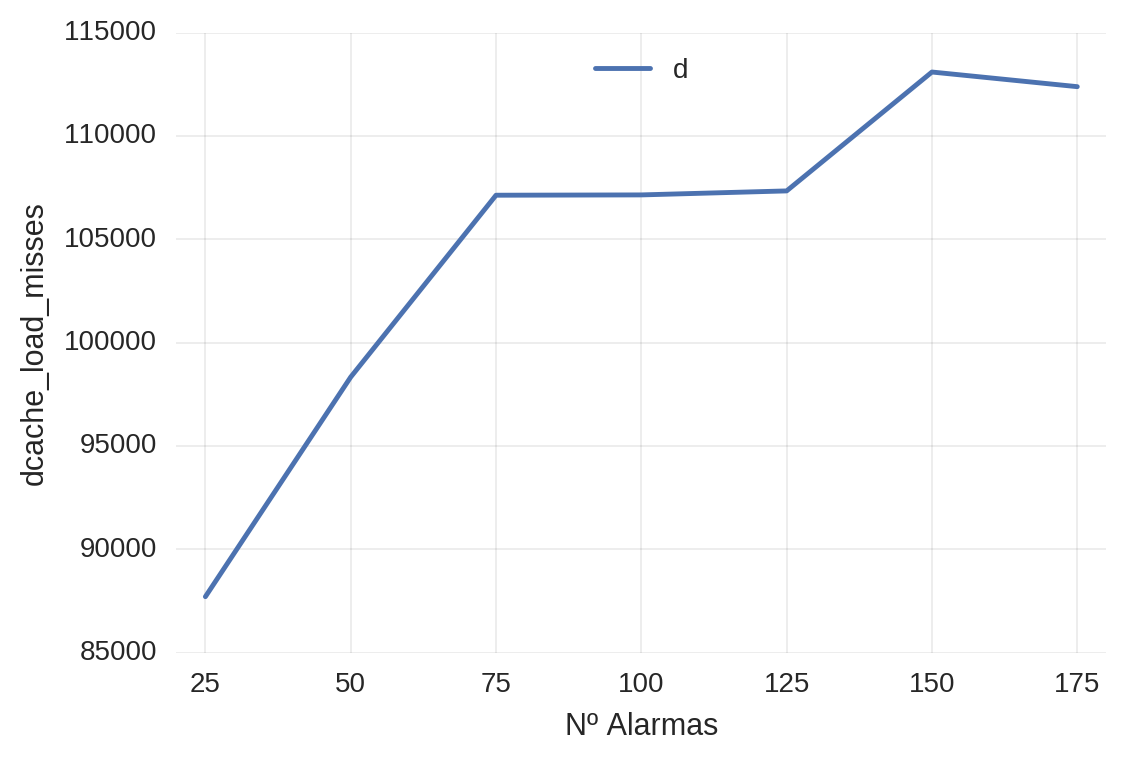

In [6]:
dcache_load_misses = CastAll(dcache_load_misses25,dcache_load_misses50,dcache_load_misses75,dcache_load_misses100,
                             dcache_load_misses125,dcache_load_misses150,dcache_load_misses175,
                            "dcache_load_misses","<",4000000,False)
CastAndPlot(dcache_load_misses,"dcache_load_misses",morder)

In [10]:
dcache_loads25 = dft25[['dcache_loads','alarmas']]
dcache_loads50 = dft50[['dcache_loads','alarmas']]
dcache_loads75 = dft75[['dcache_loads','alarmas']]
dcache_loads100 = dft100[['dcache_loads','alarmas']]
dcache_loads125 = dft125[['dcache_loads','alarmas']]
dcache_loads150 = dft150[['dcache_loads','alarmas']]
dcache_loads175 = dft175[['dcache_loads','alarmas']]
dcache_loads = CastAll(dcache_loads25,dcache_loads50,dcache_loads75,
              dcache_loads100,dcache_loads125,dcache_loads150,dcache_loads175,
              "dcache_loads","<",10000000,True)
CastAndPlot(dcache_loads,"dcache_loads",morder)

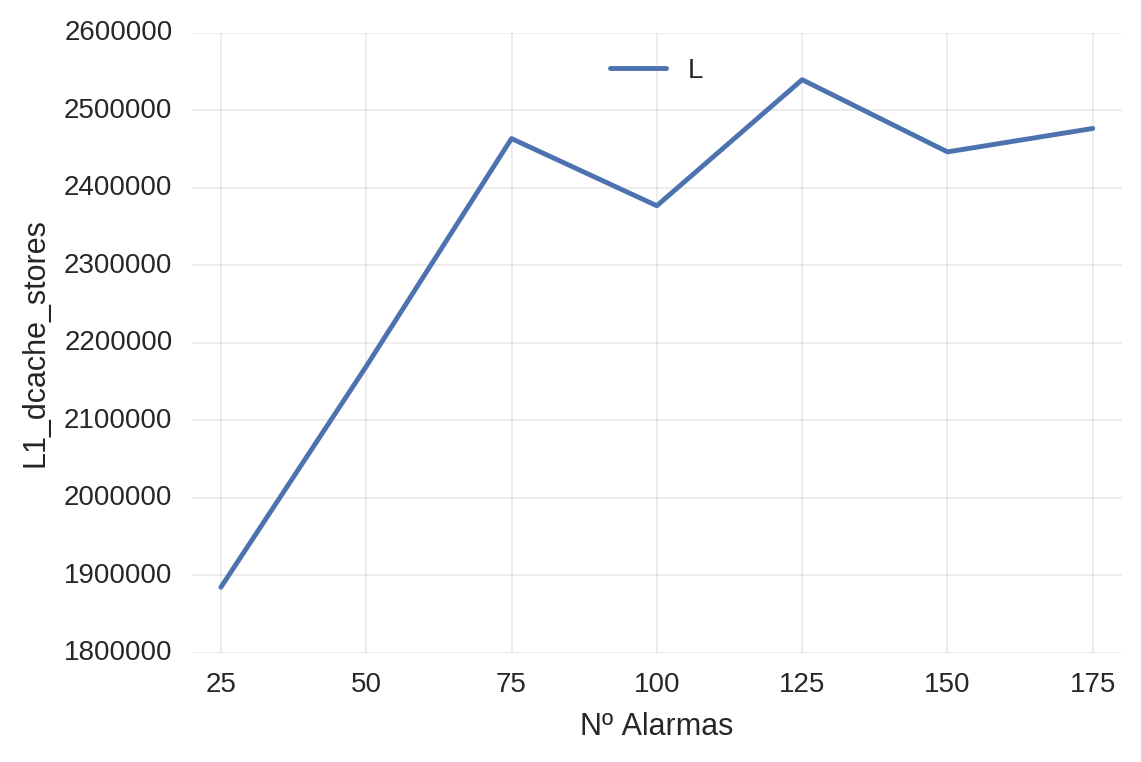

In [13]:
L1_dcache_stores25 = dft25[['L1_dcache_stores','alarmas']]
L1_dcache_stores50 = dft50[['L1_dcache_stores','alarmas']]
L1_dcache_stores75 = dft75[['L1_dcache_stores','alarmas']]
L1_dcache_stores100 = dft100[['L1_dcache_stores','alarmas']]
L1_dcache_stores125 = dft125[['L1_dcache_stores','alarmas']]
L1_dcache_stores150 = dft150[['L1_dcache_stores','alarmas']]
L1_dcache_stores175 = dft175[['L1_dcache_stores','alarmas']]
L1_dcache_stores = CastAll(L1_dcache_stores25,L1_dcache_stores50,L1_dcache_stores75,
              L1_dcache_stores100,L1_dcache_stores125,L1_dcache_stores150,L1_dcache_stores175,
              "L1_dcache_stores","<",12000000,True)
CastAndPlot(L1_dcache_stores,"L1_dcache_stores",morder)

In [32]:
LLC_loads25 = dft25[['LLC_loads','alarmas']]
LLC_loads50 = dft50[['LLC_loads','alarmas']]
LLC_loads75 = dft75[['LLC_loads','alarmas']]
LLC_loads100 = dft100[['LLC_loads','alarmas']]
LLC_loads125 = dft125[['LLC_loads','alarmas']]
LLC_loads150 = dft150[['LLC_loads','alarmas']]
LLC_loads175 = dft175[['LLC_loads','alarmas']]
CastAndPlot(LLC_loads25,LLC_loads50,LLC_loads75,
              LLC_loads100,LLC_loads125,LLC_loads150,LLC_loads175,
              "LLC_loads","<",1800000,morder)

In [33]:
cycles25 = dft25[['cycles','alarmas']]
cycles50 = dft50[['cycles','alarmas']]
cycles75 = dft75[['cycles','alarmas']]
cycles100 = dft100[['cycles','alarmas']]
cycles125 = dft125[['cycles','alarmas']]
cycles150 = dft150[['cycles','alarmas']]
cycles175 = dft175[['cycles','alarmas']]
CastAndPlot(cycles25,cycles50,cycles75,
              cycles100,cycles125,cycles150,cycles175,
              "cycles","<",80000000,morder)

In [34]:
instructions25 = dft25[['instructions','alarmas']]
instructions50 = dft50[['instructions','alarmas']]
instructions75 = dft75[['instructions','alarmas']]
instructions100 = dft100[['instructions','alarmas']]
instructions125 = dft125[['instructions','alarmas']]
instructions150 = dft150[['instructions','alarmas']]
instructions175 = dft175[['instructions','alarmas']]
CastAndPlot(instructions25,instructions50,instructions75,
              instructions100,instructions125,instructions150,instructions175,
              "instructions","<",25000000,morder)

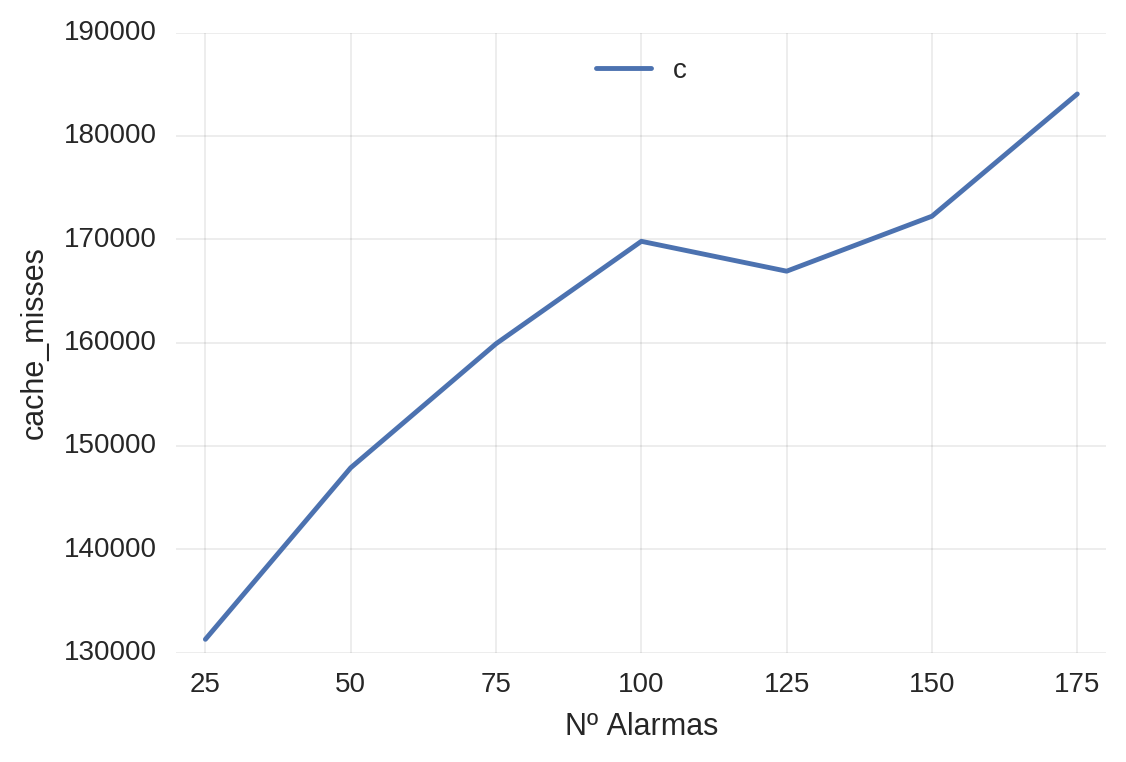

In [35]:
cache_misses25 = dft25[['cache_misses','alarmas']]
cache_misses50 = dft50[['cache_misses','alarmas']]
cache_misses75 = dft75[['cache_misses','alarmas']]
cache_misses100 = dft100[['cache_misses','alarmas']]
cache_misses125 = dft125[['cache_misses','alarmas']]
cache_misses150 = dft150[['cache_misses','alarmas']]
cache_misses175 = dft175[['cache_misses','alarmas']]
CastAndPlot(cache_misses25,cache_misses50,cache_misses75,
              cache_misses100,cache_misses125,cache_misses150,cache_misses175,
              "cache_misses","<",450000,morder)

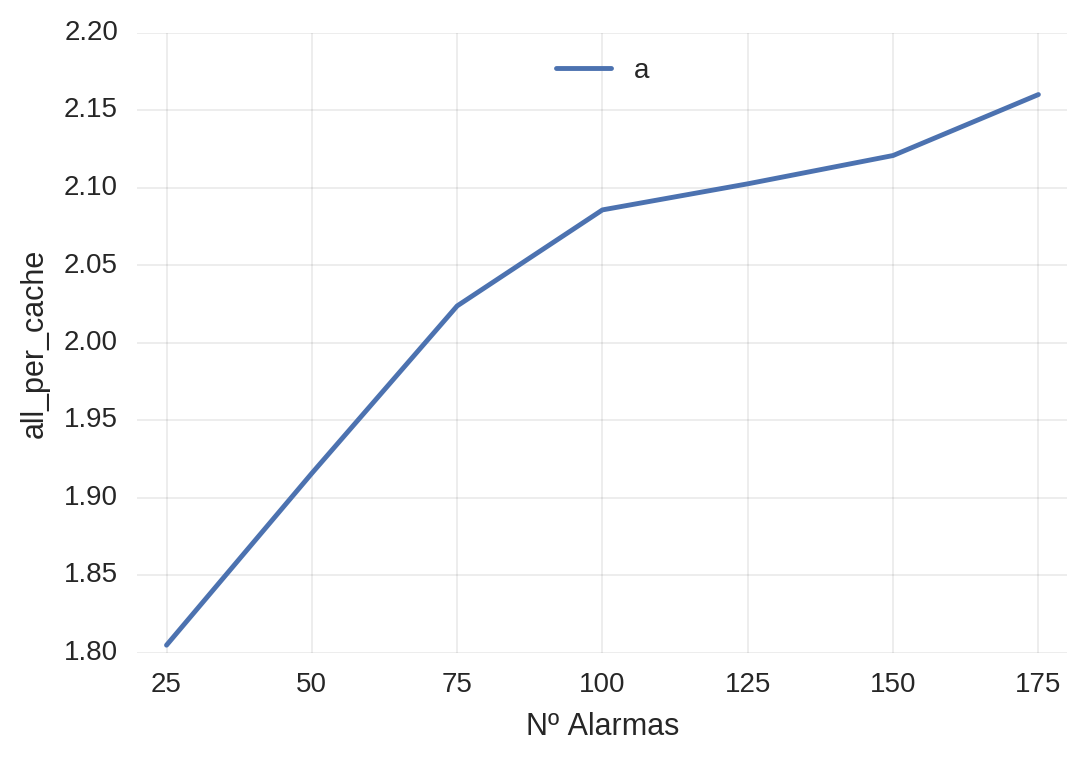

In [36]:
all_per_cache25 = dft25[['all_per_cache','alarmas']]
all_per_cache50 = dft50[['all_per_cache','alarmas']]
all_per_cache75 = dft75[['all_per_cache','alarmas']]
all_per_cache100 = dft100[['all_per_cache','alarmas']]
all_per_cache125 = dft125[['all_per_cache','alarmas']]
all_per_cache150 = dft150[['all_per_cache','alarmas']]
all_per_cache175 = dft175[['all_per_cache','alarmas']]
CastAndPlot(all_per_cache25,all_per_cache50,all_per_cache75,
              all_per_cache100,all_per_cache125,all_per_cache150,all_per_cache175,
              "all_per_cache","<",5.5,morder)

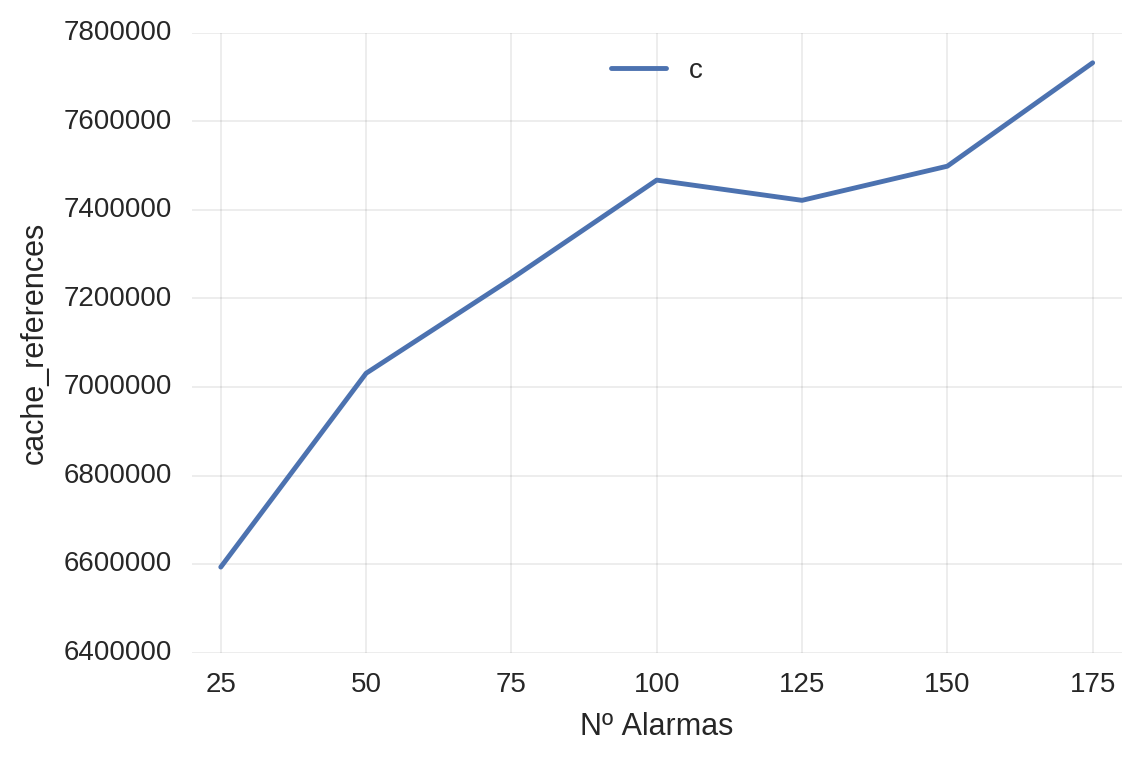

In [37]:
cache_references25 = dft25[['cache_references','alarmas']]
cache_references50 = dft50[['cache_references','alarmas']]
cache_references75 = dft75[['cache_references','alarmas']]
cache_references100 = dft100[['cache_references','alarmas']]
cache_references125 = dft125[['cache_references','alarmas']]
cache_references150 = dft150[['cache_references','alarmas']]
cache_references175 = dft175[['cache_references','alarmas']]
CastAndPlot(cache_references25,cache_references50,cache_references75,
              cache_references100,cache_references125,cache_references150,cache_references175,
              "cache_references","<",12000000,morder)

In [38]:
branches25 = dft25[['branches','alarmas']]
branches50 = dft50[['branches','alarmas']]
branches75 = dft75[['branches','alarmas']]
branches100 = dft100[['branches','alarmas']]
branches125 = dft125[['branches','alarmas']]
branches150 = dft150[['branches','alarmas']]
branches175 = dft175[['branches','alarmas']]
CastAndPlot(branches25,branches50,branches75,
              branches100,branches125,branches150,branches175,
              "branches","<",4000000,morder)

In [40]:
per_cpu25 = dft25[['per_cpu','alarmas']]
per_cpu50 = dft50[['per_cpu','alarmas']]
per_cpu75 = dft75[['per_cpu','alarmas']]
per_cpu100 = dft100[['per_cpu','alarmas']]
per_cpu125 = dft125[['per_cpu','alarmas']]
per_cpu150 = dft150[['per_cpu','alarmas']]
per_cpu175 = dft175[['per_cpu','alarmas']]
CastAndPlot(per_cpu25,per_cpu50,per_cpu75,
              per_cpu100,per_cpu125,per_cpu150,per_cpu175,
              "per_cpu","<",10,morder)